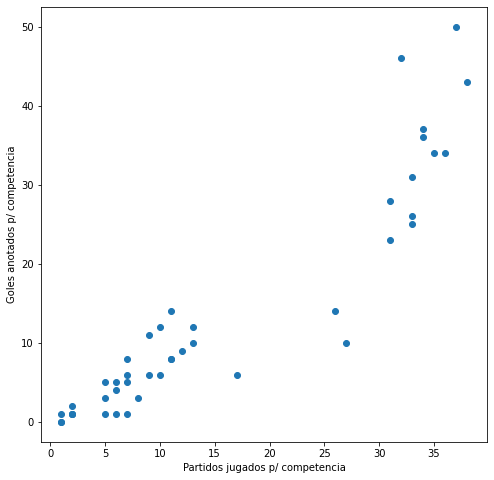

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Cargo los datos
messi_csv = pd.read_csv('./messi_barca.csv', encoding = "ISO-8859-1") 

#Visualizo
plt.figure(figsize=(8,8))
plt.scatter(messi_csv['Matches Played'],messi_csv['Goals scored'])
plt.xlabel('Partidos jugados p/ competencia')
plt.ylabel('Goles anotados p/ competencia')
plt.show()


In [2]:
#Acomodo los datos
datos_x = messi_csv['Matches Played']
datos_xn = messi_csv['Goals scored']


x = []
xn = []

for i in datos_x:
    x.append(i)
for j in datos_xn:
    xn.append(j)

import numpy as np
X = np.array(x)    
Xn = np.array(xn)

Xs = np.array((X,Xn)).T

comp = messi_csv.Competition

#Convierto las etiquetas a boolean
y=[]

for c in comp:
    if c == 'La Liga':
        y.append(0)
    if c == 'Copa del Rey':
        y.append(1)
    if c == 'Champions League':
        y.append(2)
    if c == 'Supercopa de España':
        y.append(3)
        
y = np.array(y)
    

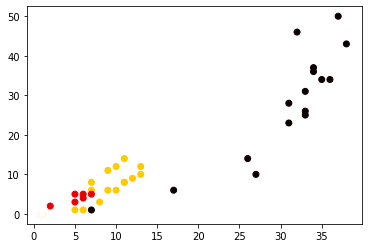

In [5]:
plt.scatter(X, Xn, c=y, cmap='hot')

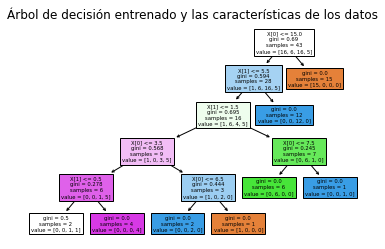

El score del modelo es: 0.9767441860465116


In [3]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np

#Creo el modelo y lo entreno con los datos a clasificar
clf = DecisionTreeClassifier().fit(Xs,y)

plt.figure()
plot_tree(clf, filled=True)
plt.title("Árbol de decisión entrenado y las características de los datos")
plt.show()

print('El score del modelo es: ' + str(clf.score(Xs, y)))

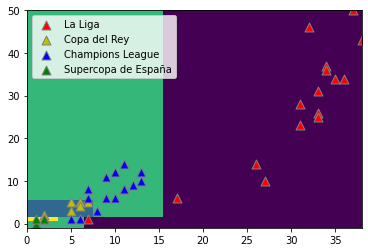

In [4]:


h=1
plot_colors = "rybg"
competition = ['La Liga', 'Copa del Rey', 'Champions League', 'Supercopa de España']
  
clf = DecisionTreeClassifier()
clf.fit(Xs, y)

# Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
x_min, x_max = Xs[:, 0].min() - 1, Xs[:, 0].max() + 1
y_min, y_max = Xs[:, 1].min() - 1, Xs[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Agregamos el resultado al gráfico
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, shading='auto')

# Ploteo los datos de entrenamiento
for i, color in zip(range(5), plot_colors):
    idx = np.where(y == i)
    plt.scatter(Xs[idx, 0], Xs[idx, 1], c=color, label=competition[i],
                    cmap=plt.cm.RdYlBu, edgecolor='grey', marker='^', s=80)
    plt.legend()

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
